# Preprocessing pipeline

In [1]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [2]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

## Starting the pipeline

In [3]:
from analysis.preprocess import PreprocessPipeline

pipeline = PreprocessPipeline(datasets_path=DATASET_PATH, disease_col_name=DISEASE_COLNAME)
pipeline.execute_pipeline()

INFO:root:Pipeline already executed, found dataset inside /tmp/chl


## Inspecting the dataset we have built

In [4]:
dataset = pipeline.dataset
dataset

,Unnamed: 0,ASF1A,BIN1,COMMD8,YTHDC2,ZNF410,RAF1,SENP6,THOP1,ICAM1,...,CCND3,ANKEF1,CYB5R2,VRK1,RAB11FIP1,ETFDH,TDP1,COMMD9,LDHA,HS6ST1
0,GS_1,0.748875,0.525198,0.748920,0.838116,0.644023,0.073698,1.000000,0.692676,0.218369,...,0.149872,0.620586,0.776944,1.000000,0.276503,0.440616,0.854661,0.765920,0.637978,0.673909
1,GS_2,1.000000,0.336823,0.728230,0.616740,0.660914,0.033242,0.728626,0.582524,0.182131,...,0.173337,0.489560,0.637111,0.759210,0.617901,0.860795,0.328673,0.632807,0.247321,0.836058
2,GS_3,0.602986,0.587513,0.844351,0.723092,0.433756,0.374056,0.326190,0.561399,0.000000,...,0.728090,0.742757,0.752385,0.377134,0.456794,0.608818,0.553043,0.762540,0.575108,0.773954
3,GS_4,0.854228,0.203061,0.797158,0.653054,0.506799,0.073278,0.194004,0.326489,0.044948,...,0.493745,0.291367,0.299001,0.950568,0.432247,0.543008,0.824849,0.620245,0.527955,0.419970
4,GS_5,0.514001,0.322851,0.651792,0.793458,0.457500,0.133231,0.370729,0.421941,0.154952,...,0.232716,0.098301,0.292156,0.324797,0.859756,0.698654,0.124738,0.622737,0.317034,0.962127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,DIABETE_171,0.612037,0.309322,0.588589,0.654691,1.000000,0.678804,0.850757,0.480000,0.286697,...,0.118489,0.803738,0.043478,1.000000,0.667972,0.234234,0.246324,0.011038,0.122260,0.304147
395,DIABETE_172,0.529630,0.756356,0.000000,0.077844,0.054545,0.085176,0.180193,0.373333,0.233945,...,0.929594,0.682243,1.000000,0.098926,0.466928,0.441441,0.727941,0.150110,0.581788,0.225806
396,DIABETE_173,0.574074,0.908898,0.028028,0.271457,0.618182,0.000000,0.000000,0.733333,0.233945,...,0.876359,1.000000,0.478261,0.052664,0.000000,0.504505,1.000000,1.000000,0.769815,0.428571
397,DIABETE_174,0.156481,0.519068,0.039039,0.135729,0.509091,0.435631,0.107290,0.000000,0.314220,...,0.390384,0.710280,0.608696,0.027261,0.261532,0.085586,0.617647,0.225166,0.000000,0.170507


## Plot disease distribution

DIABETE    176
A1A        128
NALD        38
GS          29
MCM         28
Name: DISEASE, dtype: int64


<AxesSubplot:>

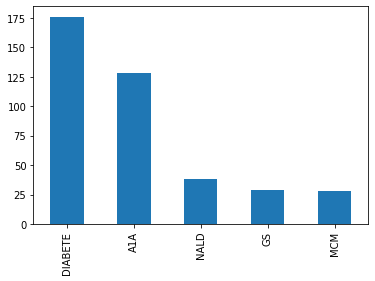

In [5]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

## Experiments

<AxesSubplot:>

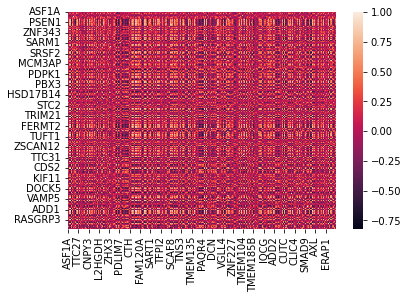

In [10]:
import seaborn as sns
dataset = dataset[dataset['DISEASE'] == 'A1A']
corr = dataset.corr()
sns.heatmap(corr)


In [11]:
import numpy as np
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = dataset.columns[columns]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4603 but corresponding boolean dimension is 4601